### Reference: https://www.coursera.org/learn/linear-regression-numpy-python

<h2 align="center"> Univariate Linear Regression </h2>

### Task 1: Load the Data and Libraries
---

In [50]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [51]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [52]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 2: Visualize the Data
---

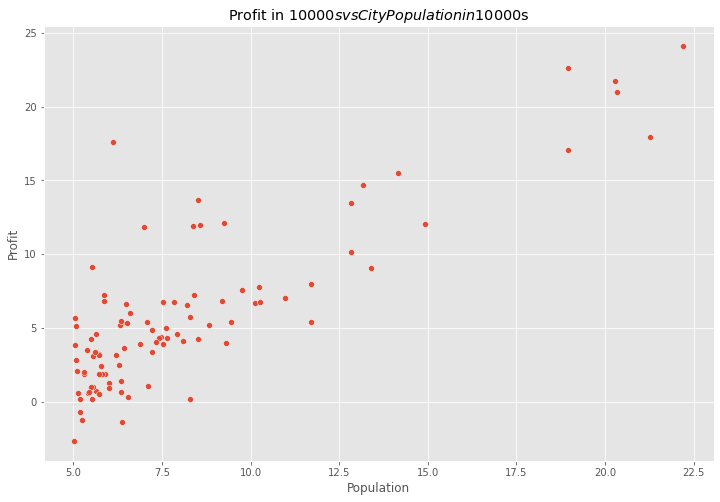

In [54]:
ax = sns.scatterplot(x="Population", y="Profit", data=data)
ax.set_title('Profit in $10000s vs City Population in $10000s')
plt.show()

### Task 3: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [55]:
def cost_function(X, y, theta):
    
    m = len(y)

    y_pred = np.dot(X, theta)
    error = (y_pred - y) ** 2
    
    cost = (1/(2*m)) * np.sum(error)
    
    return cost

Following the similar theoretical approach discussed in XOR function approximation, we append a bias vector containing all ones to the input vector, to accomodate the itercept of the linear model,

$$
y = \theta^{T}x + b
$$

In [56]:
m = data.shape[0]
x_data = data['Population'].values.reshape(m, 1)
X = np.append(np.ones((m, 1)), x_data, axis=1)

In [57]:
y = data['Profit'].values.reshape(m, 1)

Next we initialize the parameters $\theta_0$ and $\theta_1$.

In [58]:
theta = np.zeros((2, 1))

Now we can compute the value of the cost function for our chosen initial parameters.

In [59]:
cost = cost_function(X, y, theta)
print(f"The value of the cost function currently is: {cost:.4f}")

The value of the cost function currently is: 32.0727


### Task 4: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [60]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        y_pred = np.dot(X, theta)
        error = np.dot(np.transpose(X), (y_pred - y))
        theta = theta - (learning_rate * (1/m) * error)
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [61]:
learning_rate = 0.01
iterations = 2000
theta, costs = gradient_descent(X=X, y=y, theta=theta, learning_rate=learning_rate, iterations=iterations)
paramater_1 = theta[0, 0]
parameter_2 = theta[1, 0]
print(f"The value of parameters are {paramater_1:.2f} and {parameter_2:.2f}")
print(f"The linear regression model after gradient descent is: {paramater_1:.2f} + {parameter_2:.2f}x")

The value of parameters are -3.79 and 1.18
The linear regression model after gradient descent is: -3.79 + 1.18x


### Task 5: Visualising the Cost Function $J(\theta)$
---

In [62]:
from mpl_toolkits.mplot3d import Axes3D

In [63]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

C:\Users\Saad\AppData\Local\Temp\ipykernel_1316\1033142236.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


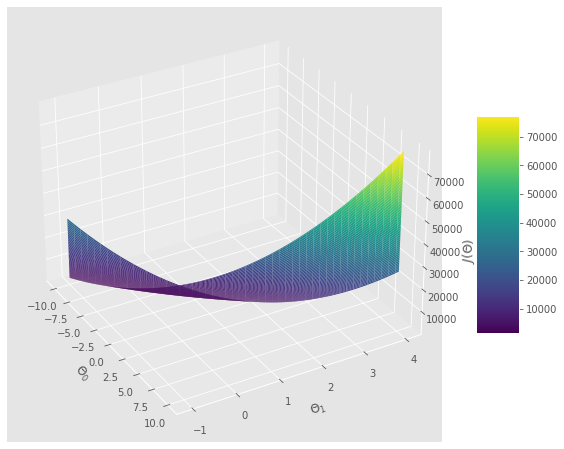

In [64]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30, 330)

plt.show()

### Task 6: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

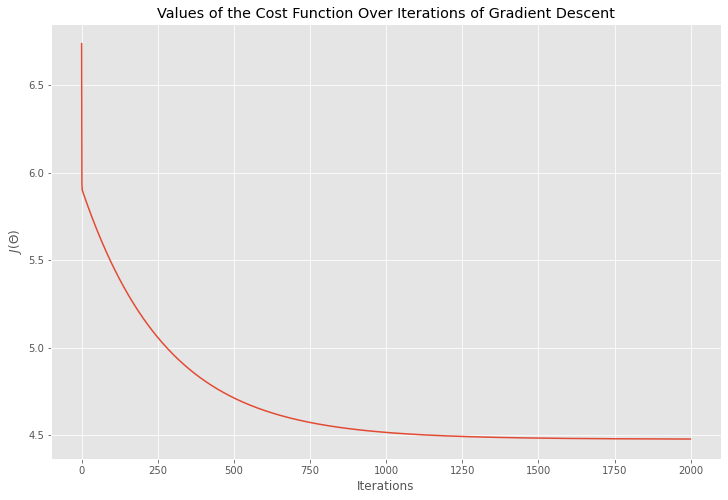

In [66]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function Over Iterations of Gradient Descent")
plt.show()

### Task 7: Training Data with Linear Regression Fit
---

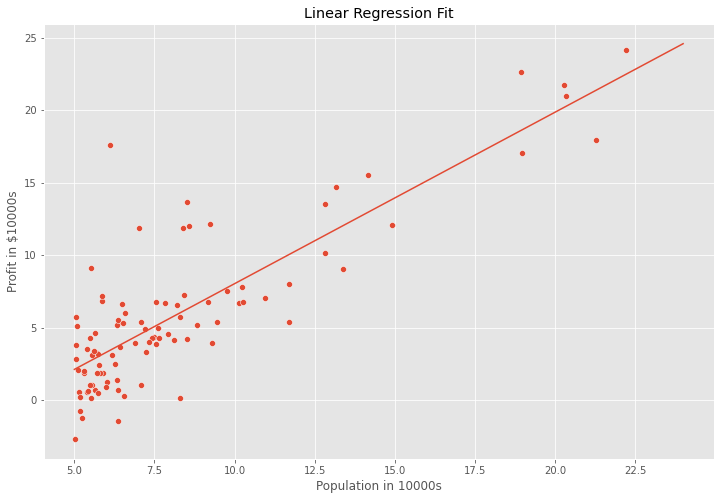

In [68]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data=data)

x_value = [x for x in range(5, 25)]
y_value = [(x*theta[1] + theta[0]) for x in x_value] 
sns.lineplot(x=x_value, y=y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10000s")
plt.title("Linear Regression Fit")
plt.show()

### Task 8: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [69]:
def predict(x, theta):
    y_pred = np.dot(np.transpose(theta), x)
    return y_pred

In [73]:
y_pred_1 = predict(np.array([1, 4]), theta) * 10000
print(f"For a population of 40000 the model predicts a profit of ${y_pred_1:.0f}")

For a population of 40000 the model predicts a profit of $9408


In [72]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print(f"For a population of 83,000 people, the model predicts a profit of ${y_pred_2:.0f}")

For a population of 83,000 people, the model predicts a profit of $60243
